In [1]:
#Import statements
import pandas as pd
import numpy as np

# Loading Data

In [5]:
#Loading the data
hotels = pd.read_csv("E:/datasets/data/goibibo_com-travel.csv")
hotels.head(3)

,additional_info,address,area,city,country,crawl_date,guest_recommendation,hotel_brand,hotel_category,hotel_description,hotel_facilities,hotel_star_rating,image_count,latitude,locality,longitude,pageurl,point_of_interest,property_id,property_name,property_type,province,qts,query_time_stamp,review_count_by_category,room_area,room_count,room_facilities,room_type,similar_hotel,site_review_count,site_review_rating,site_stay_review_rating,sitename,state,uniq_id
0,Room Service|Internet Access|Restaurant|Free I...,"15th Mile, N.H.21,Manali, District Kullu,Himac...",Others,Manali,India,2016-07-24,85.0,NaN,gostays,The standard check-in time is 12:00 PM and the...,Doctor on Call|Dry Cleaning|Laundry Service Av...,2,20,32.139387,Others,77.154660,http://www.goibibo.com/hotels/detail/Manali/hn...,Hadimba Temple|Naggar Village|Himalayan Nyingm...,HTLGBO1000016238,Baragarh Regency,Resort,Manali,2016-07-24 01:12:30 +0000,2016-07-24 01:12:30 +0000,positive reviews::74|critical reviews::13|revi...,NaN,17,Room Service |Basic Bathroom Amenities|Cable /...,Deluxe Room,https://www.goibibo.com/hotels/woodchime-homes...,87.0,4.0,Service Quality::3.9|Amenities::3.7|Food and D...,goibibo,Himachal Pradesh,2c8db027d43a9452a43e88eb30d9f983
1,Room Service|Gym/Spa,"A-585, Sushant Lok-1 ,Near Iffco Chowk Metro S...",Sushant Lok,Gurgaon,India,2016-07-24,87.0,NaN,regular,The standard check-in time is 12:00 PM and the...,Airport Transfer Available / Surcharge|Banquet...,0,17,28.472097,Sushant Lok,77.072546,http://www.goibibo.com/hotels/detail/Gurgaon/h...,Sushant Lok|Sahara Mall|Amity International Sc...,HTLGBO1000015822,Asian Suites A- 585,Guest House,Gurgaon,2016-07-24 01:12:30 +0000,2016-07-24 01:12:30 +0000,positive reviews::8|critical reviews::0|review...,14 X 12 Sq.ft.,18,Room Service |Air Conditioning |Basic Bathroom...,Deluxe Room With Free WIFI,https://www.goibibo.com/hotels/stepinn-iffco-c...,8.0,4.5,Service Quality::4.7|Amenities::4.7|Food and D...,goibibo,Haryana,e98f69f889c0235e6dc480e7df6de0de
2,Restaurant|Swimming Pool,"Cobra Vaddo,Calungate Baga Road, Bardez, Calan...",Calangute Area,Goa,India,2016-07-24,50.0,NaN,regular,The standard check-in time is 12:00 PM and the...,Swimming Pool|Bar / Lounge |Laundry Service Av...,0,28,15.548398,Calangute Area,73.757634,http://www.goibibo.com/hotels/detail/Goa/hn/87...,"Anjuna Beach|Calangute Beach|Titos lane, baga|...",HTLGBO1000004551,Bevvan Resort,Resort,Goa,2016-07-24 01:12:30 +0000,2016-07-24 01:12:30 +0000,positive reviews::1|critical reviews::1|review...,NaN,15,Room Service |Air Conditioning |Cable / Satell...,Standard Room,https://www.goibibo.com/hotels/sunrise-beach-r...,2.0,2.5,Service Quality::2.5|Amenities::2.5|Food and D...,goibibo,Goa,9b59d00eaffc273d83000ed7dcda0e83


# Data Cleaning

In [6]:
# Helper functions for encoding.
def split_piped_list(srs, col):
    try:
        ret = [r.split("::")[-1] for r in srs[col].split("|")]
        ret = [float(r) if len(r) > 0 else np.nan for r in ret]
        return ret
    except AttributeError:
        return np.nan


In [4]:
# Encode the aggregated 5-star review categories into columns.
ratings = pd.DataFrame(data=hotels.apply(
                                lambda h: split_piped_list(h, 'site_stay_review_rating'), 
                                                           axis='columns').tolist(),
                       columns=['service_quality_rating', 'amenities_rating', 
                                'food_and_drinks_rating', 'value_for_money_rating', 
                                'location_rating', 'cleanliness_rating'])
hotels = hotels.join(ratings)

# Encode the reviews column into separate columns.
review_counts = pd.DataFrame(
    data=(
        hotels
            .apply(lambda h: split_piped_list(h, 'review_count_by_category'), axis='columns')
            .map(lambda v: [0, 0, 0] if isinstance(v, float) else v).tolist()
    ),
    columns=['positive_reviews_total', 'critical_reviews_total', 'reviews_with_images_total']
)
hotels = hotels.join(review_counts)

hotels = hotels.drop(['country', 'sitename', 'review_count_by_category', 
                      'site_stay_review_rating'], axis='columns')
hotels = hotels.drop(hotels['room_count'].argmax())  # bad entry

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


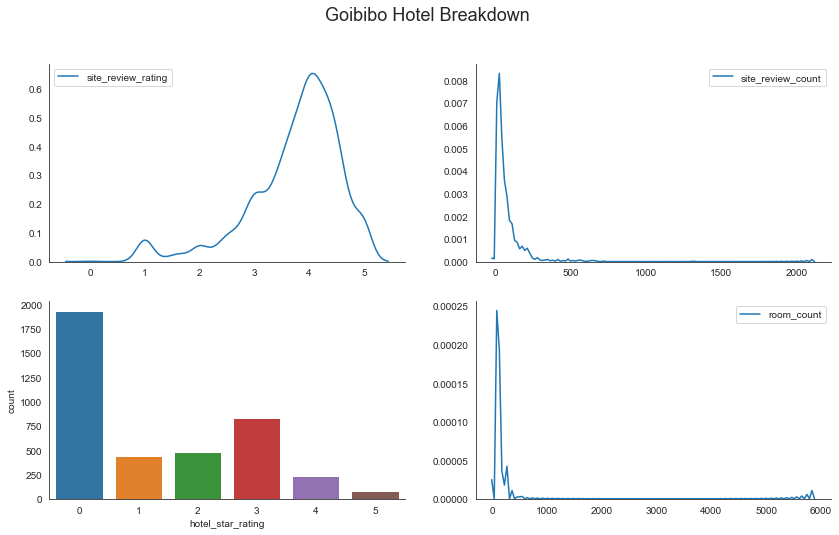

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

f, axarr = plt.subplots(2, 2, figsize=(14, 8))
plt.suptitle('Goibibo Hotel Breakdown', fontsize=18)

sns.kdeplot(hotels['site_review_rating'], ax=axarr[0][0])
sns.kdeplot(hotels['site_review_count'], ax=axarr[0][1])
sns.countplot(hotels['hotel_star_rating'], ax=axarr[1][0])
sns.kdeplot(hotels['room_count'], ax=axarr[1][1])

sns.despine()